## Convolutional Recurrent Neural Network (CRNN)

11493376/11490434 [==============================] - 1s 0us/step


2023-04-12 00:53:47.044652: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-12 00:53:47.197338: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-04-12 00:53:47.197735: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1999990000 Hz


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

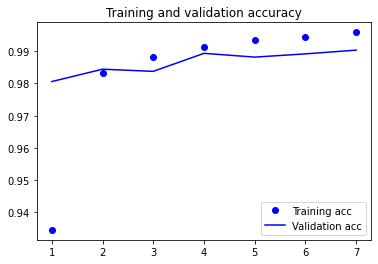

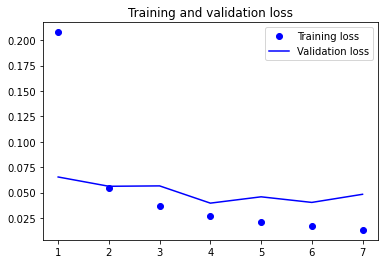

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# load the data
(train_data, train_labels), (test_data, test_labels) = keras.datasets.mnist.load_data()

# preprocess the data
train_data = train_data.reshape((train_data.shape[0], 28, 28, 1))
test_data = test_data.reshape((test_data.shape[0], 28, 28, 1))
train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

# define the model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# define callbacks
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# train the model
history = model.fit(train_data, train_labels, batch_size=64, epochs=10, validation_split=.2, callbacks=[early_stop])

# plot accuracy and loss
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [2]:
# final stats(loss and accuracy)
final_loss, final_accuracy = model.evaluate(test_data, test_labels)

# print the results in percentage form
print("Final Loss: {:.2f}%".format(final_loss * 100))
print("Final Accuracy: {:.2f}%".format(final_accuracy * 100))

313/313 [==============================] - 1s 5ms/step - loss: 0.0357 - accuracy: 0.9917
Final Loss: 3.57%
Final Accuracy: 99.17%
